In [1]:
#import
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

seed = 42
np.random.seed(seed)
random.seed(seed)

Data Acquisition

In [21]:
movies_df = pd.read_csv('ml-25m/movies.csv', sep=',')
#one-hot encoding dei generi
genres = movies_df['genres'].str.get_dummies(sep='|')
movies_df = pd.concat([movies_df, genres], axis=1)
#data-visualization
movies_gen = movies_df.copy()
movies_gen.drop('genres', axis=1, inplace=True)

movies_df.drop('genres', axis=1, inplace=True)

In [22]:
g_tags= pd.read_csv('ml-25m/genome-tags.csv', sep= ',')
g_scores= pd.read_csv('ml-25m/genome-scores.csv', sep= ',')

#merge dei df
df= movies_df.merge(g_scores, on= 'movieId')
df= df.merge(g_tags, on= 'tagId')
df = df.pivot_table(index=['movieId', 'title'], columns='tag', values='relevance', fill_value=0).reset_index().rename_axis(None, axis=1)
df.head()

,movieId,title,007,007 (series),18th century,1920s,1930s,1950s,1960s,1970s,...,world politics,world war i,world war ii,writer's life,writers,writing,wuxia,wwii,zombie,zombies
0,1,Toy Story (1995),0.02875,0.02375,0.06250,0.07575,0.14075,0.14675,0.06350,0.20375,...,0.04050,0.01425,0.03050,0.03500,0.14125,0.05775,0.03900,0.02975,0.08475,0.02200
1,2,Jumanji (1995),0.04125,0.04050,0.06275,0.08275,0.09100,0.06125,0.06925,0.09600,...,0.05250,0.01575,0.01250,0.02000,0.12225,0.03275,0.02100,0.01100,0.10525,0.01975
2,3,Grumpier Old Men (1995),0.04675,0.05550,0.02925,0.08700,0.04750,0.04775,0.04600,0.14275,...,0.06275,0.01950,0.02225,0.02300,0.12200,0.03475,0.01700,0.01800,0.09100,0.01775
3,4,Waiting to Exhale (1995),0.03425,0.03800,0.04050,0.03100,0.06500,0.03575,0.02900,0.08650,...,0.05325,0.02800,0.01675,0.03875,0.18200,0.07050,0.01625,0.01425,0.08850,0.01500
4,5,Father of the Bride Part II (1995),0.04300,0.05325,0.03800,0.04100,0.05400,0.06725,0.02775,0.07650,...,0.05350,0.02050,0.01425,0.02550,0.19225,0.02675,0.01625,0.01300,0.08700,0.01600


In [23]:
ratings= pd.read_csv('ml-25m/ratings.csv', sep= ',')
#meadia per ogni film
ratings = ratings.groupby(['movieId'])['rating'].mean().reset_index()
#print(ratings.columns)
print(df.columns)


Index(['movieId', 'title', '007', '007 (series)', '18th century', '1920s',
       '1930s', '1950s', '1960s', '1970s',
       ...
       'world politics', 'world war i', 'world war ii', 'writer's life',
       'writers', 'writing', 'wuxia', 'wwii', 'zombie', 'zombies'],
      dtype='object', length=1130)


In [24]:
#merge rating e df
df = ratings.merge(df, on='movieId')
movies_gen = movies_gen.merge(ratings, on='movieId')
movies_gen.drop('movieId', axis=1, inplace=True)
df = df.drop(['title'], axis=1)


In [26]:
df= df.drop('movieId', axis=1)
print(df.shape)
df.head(5)

(13816, 1129)


,rating,007,007 (series),18th century,1920s,1930s,1950s,1960s,1970s,1980s,...,world politics,world war i,world war ii,writer's life,writers,writing,wuxia,wwii,zombie,zombies
0,3.893708,0.02875,0.02375,0.06250,0.07575,0.14075,0.14675,0.06350,0.20375,0.2020,...,0.04050,0.01425,0.03050,0.03500,0.14125,0.05775,0.03900,0.02975,0.08475,0.02200
1,3.251527,0.04125,0.04050,0.06275,0.08275,0.09100,0.06125,0.06925,0.09600,0.0765,...,0.05250,0.01575,0.01250,0.02000,0.12225,0.03275,0.02100,0.01100,0.10525,0.01975
2,3.142028,0.04675,0.05550,0.02925,0.08700,0.04750,0.04775,0.04600,0.14275,0.0285,...,0.06275,0.01950,0.02225,0.02300,0.12200,0.03475,0.01700,0.01800,0.09100,0.01775
3,2.853547,0.03425,0.03800,0.04050,0.03100,0.06500,0.03575,0.02900,0.08650,0.0320,...,0.05325,0.02800,0.01675,0.03875,0.18200,0.07050,0.01625,0.01425,0.08850,0.01500
4,3.058434,0.04300,0.05325,0.03800,0.04100,0.05400,0.06725,0.02775,0.07650,0.0215,...,0.05350,0.02050,0.01425,0.02550,0.19225,0.02675,0.01625,0.01300,0.08700,0.01600


Data Visualizzation

In [27]:
print(f"Numero di campioni:" , df.shape[0])
df.describe()

Numero di campioni: 13816


,rating,007,007 (series),18th century,1920s,1930s,1950s,1960s,1970s,1980s,...,world politics,world war i,world war ii,writer's life,writers,writing,wuxia,wwii,zombie,zombies
count,13816.000000,13816.000000,13816.000000,13816.000000,13816.000000,13816.000000,13816.000000,13816.000000,13816.000000,13816.000000,...,13816.000000,13816.000000,13816.000000,13816.000000,13816.000000,13816.000000,13816.000000,13816.000000,13816.000000,13816.000000
mean,3.272180,0.046596,0.044771,0.078292,0.085599,0.129250,0.088348,0.074092,0.180610,0.096887,...,0.117631,0.043644,0.048769,0.062500,0.245069,0.097053,0.041831,0.042961,0.125901,0.031766
std,0.484078,0.071478,0.062601,0.111595,0.086021,0.146648,0.105167,0.100385,0.140021,0.134208,...,0.136072,0.083196,0.146318,0.083094,0.122572,0.089406,0.074281,0.135702,0.104373,0.084668
min,0.899038,0.007000,0.007250,0.006000,0.010000,0.017250,0.004250,0.004500,0.015250,0.002250,...,0.009250,0.004000,0.002500,0.003500,0.039750,0.006750,0.005250,0.001500,0.034750,0.007750
25%,2.986574,0.025750,0.026750,0.028750,0.037250,0.053250,0.029500,0.024500,0.079750,0.024750,...,0.052000,0.017250,0.011000,0.022500,0.160250,0.042000,0.021500,0.008500,0.081500,0.016500
50%,3.340420,0.033750,0.034750,0.042000,0.056000,0.078250,0.052750,0.041500,0.137750,0.047750,...,0.072250,0.022500,0.015250,0.039750,0.216500,0.069000,0.028000,0.012250,0.097500,0.019000
75%,3.629630,0.045312,0.047250,0.079500,0.102250,0.136000,0.101500,0.078750,0.235750,0.107250,...,0.118250,0.034000,0.024000,0.074000,0.296250,0.119000,0.038312,0.020000,0.126000,0.023500
max,4.483096,0.999750,1.000000,0.997750,0.922000,0.988000,0.920000,0.913500,0.925500,0.987000,...,0.999250,0.981000,0.999000,0.992750,0.972500,0.974750,1.000000,0.995250,0.992250,0.994250


In [28]:
print("Valori nulli:", df.isnull().sum().sum())
print("Valori duplicati:", df.duplicated().sum())

Valori nulli: 0


Valori duplicati: 0


In [29]:
print("Media dei voti:", df['rating'].mean())
print("Moda dei voti:", df['rating'].mode())
print("Mediana dei voti:", df['rating'].median())
print("Deviazione standard dei voti:", df['rating'].std())

Media dei voti: 3.272179588605234
Moda dei voti: 0    3.5
Name: rating, dtype: float64
Mediana dei voti: 3.340419725202334
Deviazione standard dei voti: 0.4840784613559373


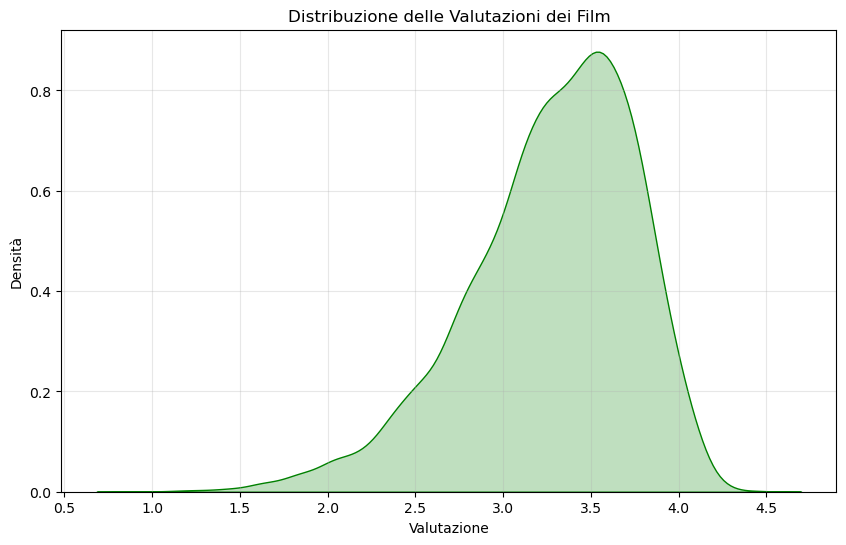

In [30]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df['rating'], shade=True, color='g')
plt.grid(True, zorder=1, linestyle='-', alpha=0.3)
plt.title('Distribuzione delle Valutazioni dei Film')
plt.xlabel('Valutazione')
plt.ylabel('Densità')
plt.show()


Correlazione genere voto

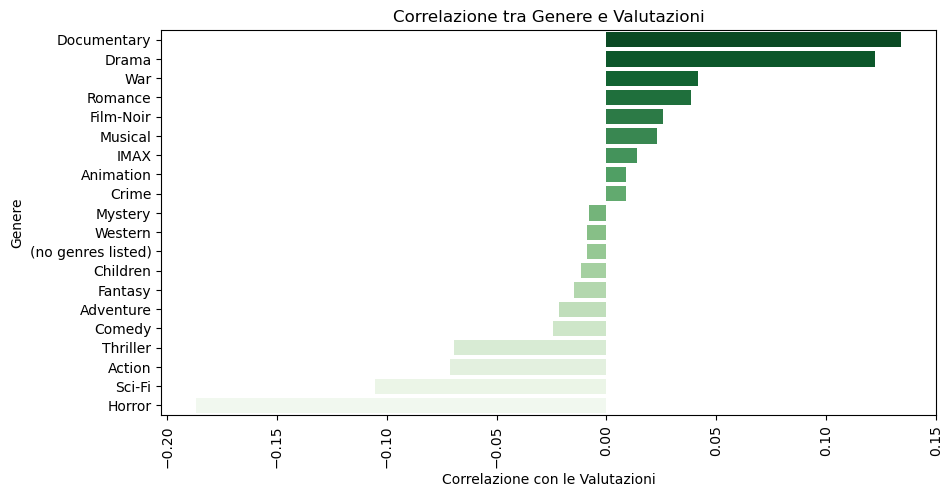

In [7]:
#calculate the correlation in movies_copy
corr = movies_gen.corr()
corr.sort_values(by=['rating'], ascending=False, inplace=True)
corr= corr[1:]

#plot the correlation with barplot
plt.figure(figsize=(10, 5))
sns.barplot(x=corr.rating, y=corr.index, palette= 'Greens_r')
plt.xticks(rotation=90)
plt.xlabel('Correlazione con le Valutazioni')
plt.ylabel('Genere')
plt.title('Correlazione tra Genere e Valutazioni')
plt.show()

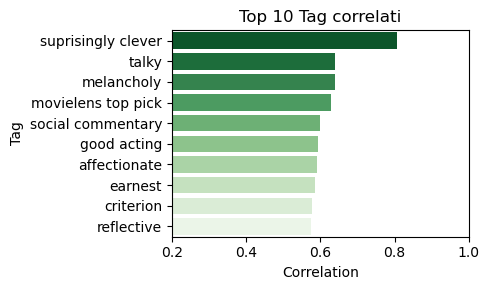

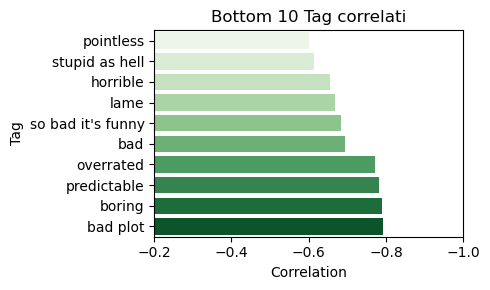

In [8]:
# Calcola la matrice di correlazione
corr_df = df.copy()
corr_df= corr_df.corr()

# Ordina in base alla correlazione con le valutazioni
corr_df.sort_values(by=['rating'], ascending=False, inplace=True)
corr_df = corr_df[1:]

# Seleziona i primi 5 e gli ultimi 5
top_corr = corr_df.head(10)
bottom_corr = corr_df.tail(10)

# Plot dei 5 migliori risultati
plt.figure(figsize=(5, 3))
sns.barplot(x=top_corr['rating'], y=top_corr.index, palette='Greens_r', zorder=2)
plt.title('Top 10 Tag correlati')
plt.xlabel('Correlation')
plt.ylabel('Tag')
plt.xlim(0.2, 1.0)
plt.tight_layout()

plt.show()

# Plot dei 5 peggiori risultati
plt.figure(figsize=(5, 3))
sns.barplot(x=bottom_corr['rating'], y=bottom_corr.index, palette='Greens', zorder=2)
plt.title('Bottom 10 Tag correlati')
plt.xlabel('Correlation')
plt.ylabel('Tag')
plt.xlim(-0.2, -1.0)
plt.tight_layout()

plt.show()


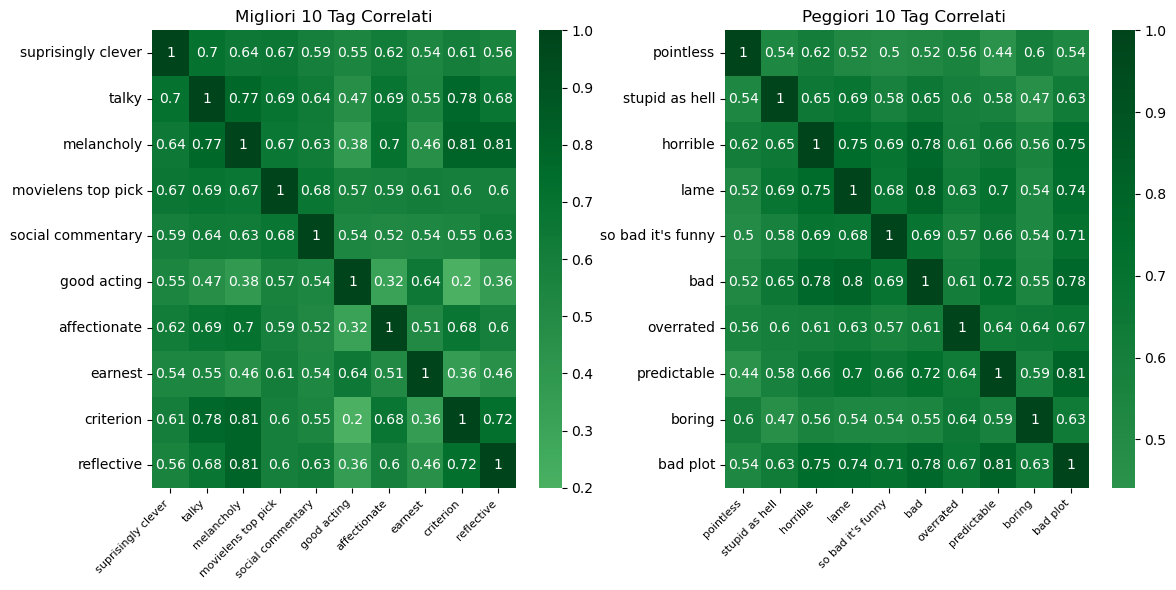

In [9]:
# Stampa le matrici di correlazione per i dataframe top_corr e bottom_corr
top_corr_matrix = df[top_corr.index].corr()
bottom_corr_matrix = df[bottom_corr.index].corr()

# Plot delle matrici di correlazione come mappe di calore
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(top_corr_matrix, cmap='Greens', center=0, annot=True)
plt.title('Migliori 10 Tag Correlati')
plt.xticks(rotation=45, ha="right", fontsize=8)  # Inclina le etichette
plt.tight_layout()

plt.subplot(1, 2, 2)
sns.heatmap(bottom_corr_matrix, cmap='Greens', center=0, annot=True)
plt.title('Peggiori 10 Tag Correlati ')
plt.xticks(rotation=45, ha="right", fontsize=8)  # Inclina le etichette
plt.tight_layout()

plt.show()


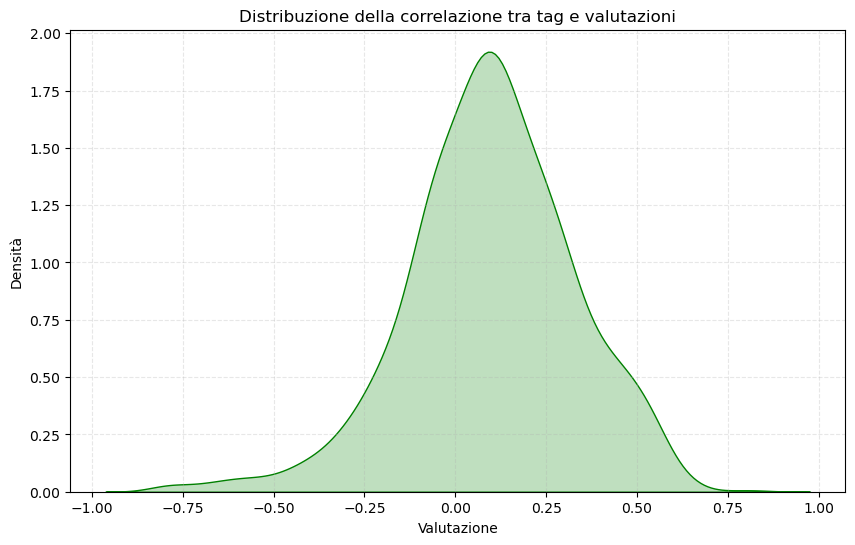

In [10]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=corr_df['rating'], shade=True, color='g')
plt.grid(True, zorder=1, linestyle='--', alpha=0.3)
plt.title('Distribuzione della correlazione tra tag e valutazioni')
plt.xlabel('Valutazione')
plt.ylabel('Densità')
plt.show()

Meadia dei rating per generi

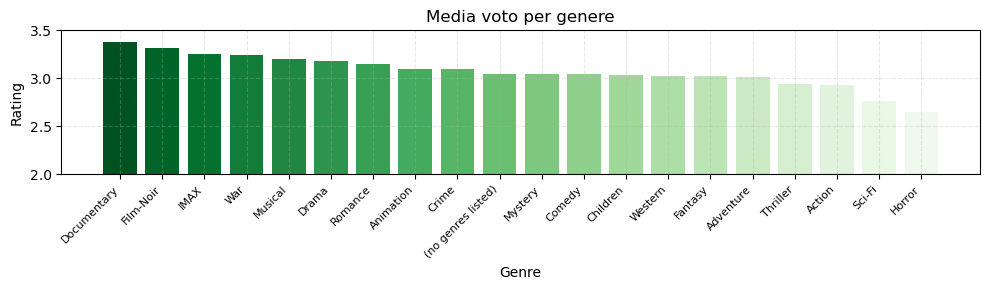

In [11]:
gen = movies_gen.columns[1:]
gen_rating = pd.DataFrame(columns=['genre', 'rating'])

for genre in gen:
    rating = movies_gen[movies_gen[genre] == 1]['rating'].mean()
    gen_rating = pd.concat([gen_rating, pd.DataFrame([[genre, rating]], columns=['genre', 'rating'])])

# Rimuovi il genere "rating" dal DataFrame
gen_rating = gen_rating[gen_rating['genre'] != 'rating']

# Ordina per rating
gen_rating = gen_rating.sort_values(by='rating', ascending=False)

plt.figure(figsize=(10, 3))

# Crea un palette di colori sfumato
color_palette = sns.color_palette("Greens_r", n_colors=len(gen_rating))

# Crea il grafico a barre con le etichette sull'asse x a 45 gradi e colori sfumati
plt.bar(gen_rating['genre'], gen_rating['rating'], color=color_palette)
plt.xticks(rotation=45, ha="right", fontsize=8)  # Ruota le etichette sull'asse x di 45 gradi
plt.grid(True, zorder=1, linestyle='--', alpha=0.3)
plt.ylim(2.0, 3.5)
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.title('Media voto per genere')
plt.tight_layout()

plt.show()


Similarità film per voto

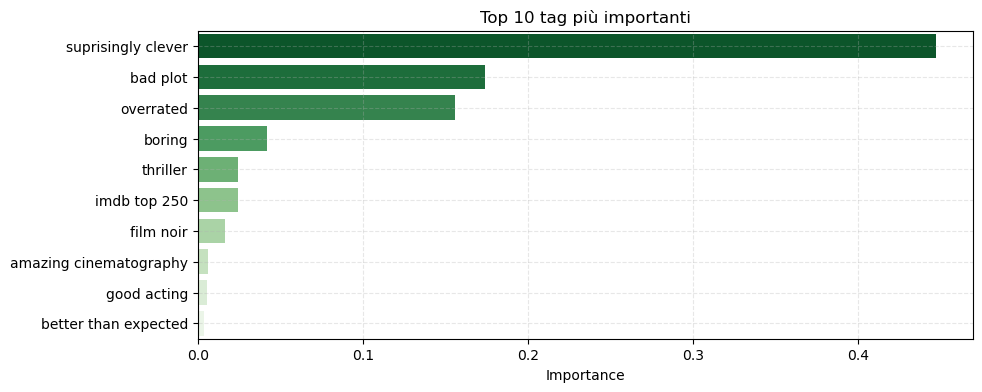

In [12]:
from sklearn.ensemble import RandomForestRegressor

X = df.drop('rating', axis=1)
y = df['rating']

rf = RandomForestRegressor(n_estimators=10, random_state=42)
rf.fit(X, y)

importance = rf.feature_importances_

# sort the features by importance
indices = np.argsort(importance)[::-1]
features = X.columns[indices]
indices = indices[:10]
features = features[:10]

plt.figure(figsize=(10, 4))
sns.barplot(x=importance[indices], y=features, palette='Greens_r')
plt.grid(True, zorder=1, linestyle='--', alpha=0.3)
plt.title('Top 10 tag più importanti')
plt.xlabel('Importance')

plt.show()

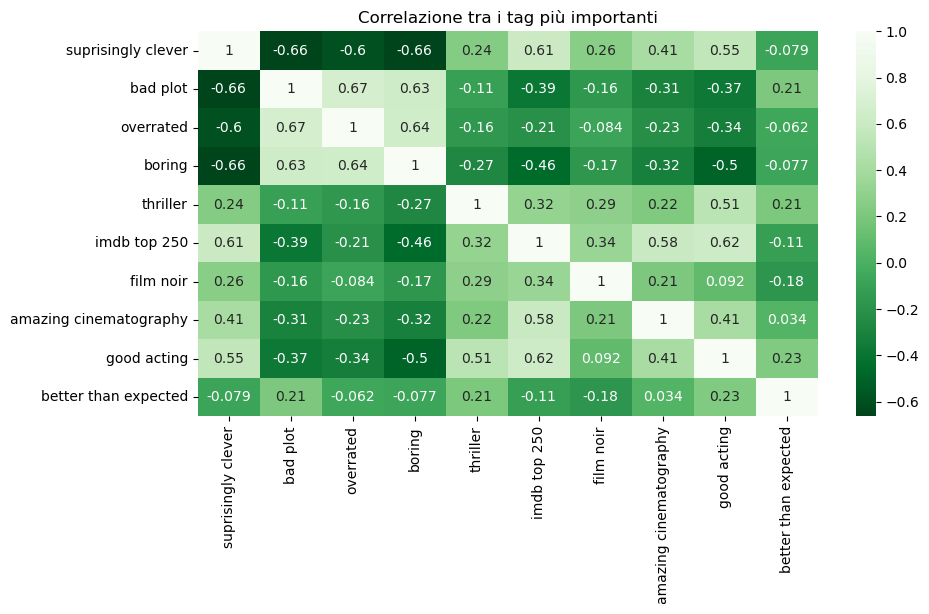

In [13]:
plt.figure(figsize=(10, 5))
sns.heatmap(df[features].corr(), annot=True, cmap='Greens_r')
plt.title('Correlazione tra i tag più importanti')
plt.show()

Visualizzazione 2D dei dati


/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


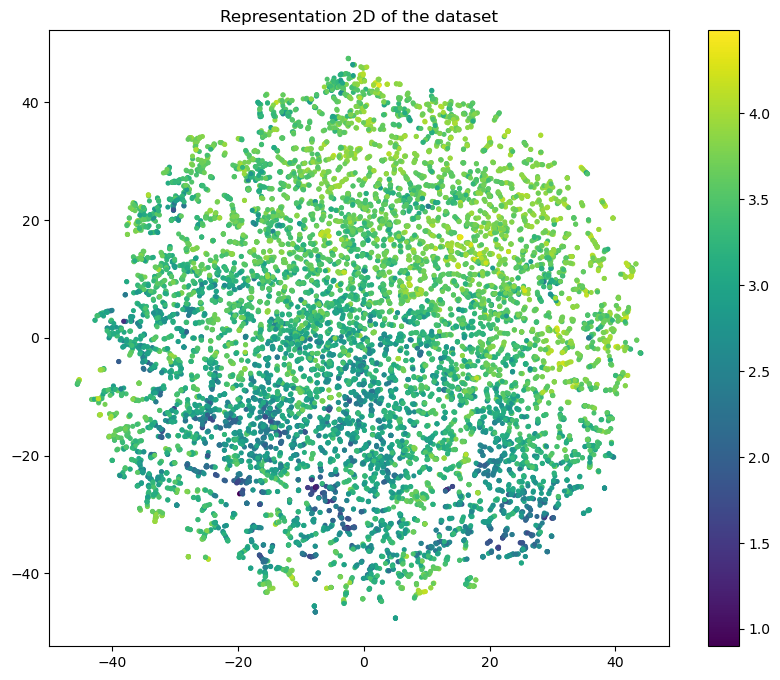

In [31]:
X = df.drop('rating', axis=1)
y = df['rating']
# pca
pca = PCA(n_components=0.95)
pca.fit(X)
X = pca.transform(X)


tsne = TSNE(n_components=2, random_state=1, perplexity=5, n_iter=500)
X_train = tsne.fit_transform(X)
    
plt.figure(figsize=(10,8))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y, cmap='viridis',s=7)
plt.title('Representation 2D of the dataset')
plt.colorbar()
plt.show()


In [15]:
df.to_csv("ml-25m/dataset.csv",index=False)